# Analysis Google Play Store

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.shape

(10841, 13)

In [8]:
df.columns.tolist()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [9]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [17]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [18]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace("$", ""))

In [19]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [20]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Analysis

In [25]:
df.groupby('Category').size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=False).head(10)

,Category,Counts
12,FAMILY,1972
15,GAME,1144
30,TOOLS,843
21,MEDICAL,463
5,BUSINESS,460
26,PRODUCTIVITY,424
24,PERSONALIZATION,392
7,COMMUNICATION,387
29,SPORTS,384
19,LIFESTYLE,382


In [31]:
df.groupby('Rating').size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=False).head(10)

,Rating,Counts
32,4.4,1109
31,4.3,1076
33,4.5,1038
30,4.2,952
34,4.6,823
29,4.1,708
28,4.0,568
35,4.7,499
27,3.9,386
26,3.8,303


In [34]:
df.groupby('Android Ver').size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=False).head(20)

,Android Ver,Counts
17,4.1 and up,2451
15,4.0.3 and up,1501
13,4.0 and up,1375
32,Varies with device,1362
20,4.4 and up,980
8,2.3 and up,652
25,5.0 and up,601
18,4.2 and up,394
9,2.3.3 and up,281
7,2.2 and up,244


## Charts

### Installs

plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Installs'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

## Free vs Pay apps

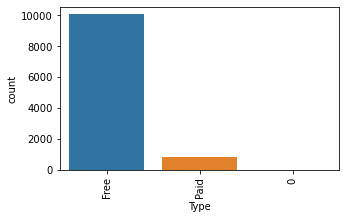

In [44]:
plt.figure(figsize=(5,3))
fig = sns.countplot(x=df['Type'])
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

## Content rating

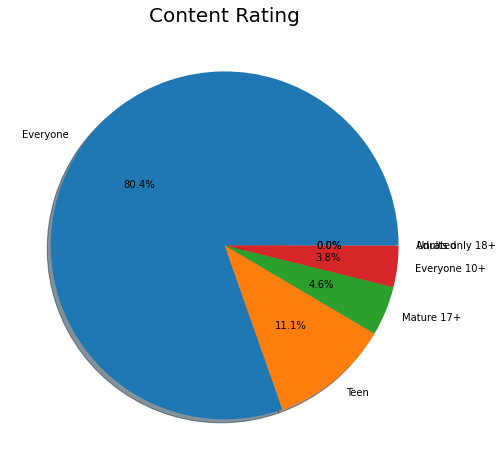

In [49]:
fig = plt.figure(figsize=(16,8))
labels = df['Content Rating'].value_counts(sort = True).index
sizes = df['Content Rating'].value_counts(sort = True)
plt.pie(sizes, labels = labels ,autopct='%1.1f%%', shadow=True)
plt.title('Content Rating', size = 20)
plt.show()

## Averange price in each category

In [53]:
df2 = df.copy()
df2.drop(df2[df2['Price'] == 'Everyone'].index, inplace=True)
df2['Price'] = pd.to_numeric(df2['Price'])

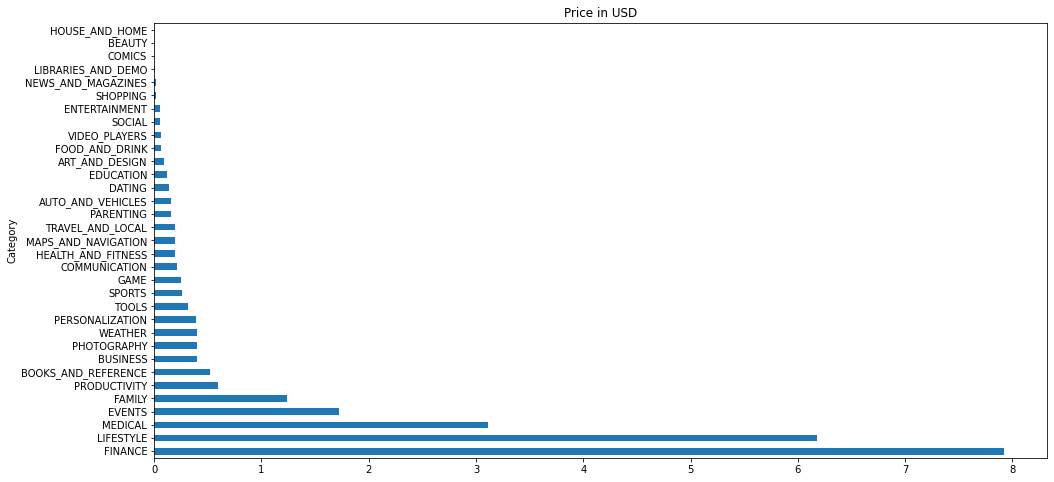

In [54]:
fig = plt.figure(figsize=(16,8))
df2.groupby('Category').mean().sort_values(by='Price',ascending=False)['Price'].plot(kind='barh', title='Price in USD', fontsize=10)
plt.ylabel=('App Category')
plt.xlabel=('Averange price in USD')
plt.show()

## Price by apps

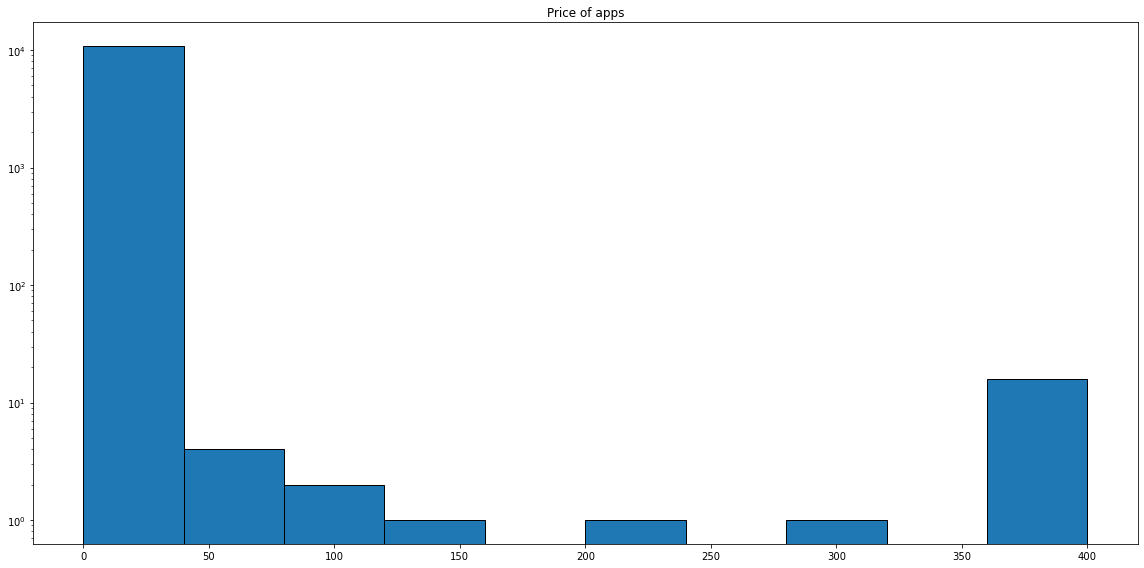

In [62]:
fig = plt.figure(figsize=(16,8)) 
plt.hist(df2['Price'],edgecolor = 'black', log=True)
plt.title("Price of apps")
plt.tight_layout()
plt.show()

## Conclusiones

- Hay algunas con error en el dataset
- Finanzas tiene las aplicaciones mas caras
- La mayoria de aplicaciones estan entre 0 a 40 dolares aporximadamente